## Question 1
Consider the single variable function
$$
f(w) = 2w^4 - 4w^3 - 15w^2 + 15w + 5
$$
shown in Fig. 1.


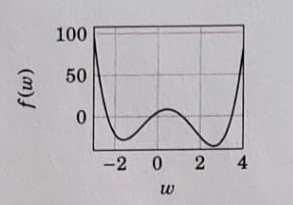


1. (a) Analytically find the minima of $f(w)$.
2. (b) Carry out two gradient descent steps starting from $w_0 = 1$ with the learning rate $\eta = 0.03$.
3. (c) Repeat the above with $\eta = 0.05$.

a) $f(w)$ minima analytically:

To find the minima, we need to take the derivative $ f'(w) $, set it to zero, and solve for $ w $.

1. **Find the First Derivative**:
   $$
   f'(w) = 8w^3 - 12w^2 - 30w + 15
   $$

2. **Set the First Derivative to Zero**:
   $$
   8w^3 - 12w^2 - 30w + 15 = 0
   $$

We need to solve this cubic equation. The solutions will give us the critical points, which could be minima, maxima, or saddle points.

3. **Find the Second Derivative to Confirm Minima**:
   $$
   f''(w) = 24w^2 - 24w - 30
   $$

We'll evaluate $ f''(w) $ at the critical points to confirm if they are minima (where $ f''(w) > 0 $).

In [5]:
import torch

# Define the function f(w)
def f(w):
    return 2 * w**4 - 4 * w**3 - 15 * w**2 + 15 * w + 5

# Define w as a tensor and set requires_grad=True to enable gradient computation
w = torch.tensor(1.0, requires_grad=True)  # Start with an arbitrary point, we'll change it later

# Compute the first derivative analytically using autograd
f_value = f(w)  # Compute f(w)
f_value.backward()  # Calculate df/dw (first derivative)
first_derivative = w.grad.item()

# Output the first derivative at w=1 (arbitrary choice to demonstrate)
print("First Derivative (f'(w)) at w=1:", first_derivative)

# Now we reset w and compute first and second derivatives at critical points
# We'll search for roots of the first derivative, so we create a new tensor w for this purpose
w_critical = torch.tensor(0.0, requires_grad=True)  # Start from 0 as an example

# Define function and first derivative using PyTorch's autograd
f_value = f(w_critical)  # Compute f(w) again for the new tensor
first_derivative = torch.autograd.grad(f_value, w_critical, create_graph=True)[0]  # Compute f'(w)

# Solve f'(w) = 0 analytically
# If f'(w) is a polynomial, roots can be found using a numerical solver, or PyTorch's find_root methods if implemented

# For simplicity, we check the second derivative at an example critical point
# (You may use a numerical method to find all roots of f'(w))

# Compute second derivative at w_critical
first_derivative.backward()  # Compute second derivative by differentiating f'(w)
second_derivative = w_critical.grad.item()

print(f"Second derivative (f''(w)) at critical point w={w_critical.item()}:", second_derivative)


First Derivative (f'(w)) at w=1: -19.0
Second derivative (f''(w)) at critical point w=0.0: -30.0


b) 2 gradient descent steps from $w_0 = 1$ with the learning rate $\eta = 0.03$.

We start at $ w_0 = 1 $ and take two gradient descent steps with learning rate $ \eta = 0.03 $.

1. **Gradient Descent Update Rule**:
   $$
   w_{new} = w_{old} - \eta \cdot f'(w_{old})
   $$

2. **Compute Two Steps**:

Here’s the Python code to Compute:

In [ ]:
import torch

# Define the initial setup for gradient descent
eta = 0.03
w_val = torch.tensor(1.0, requires_grad=True)  # starting point

num_steps = 2

# Gradient descent steps
for step in range(num_steps):
    # Define the function
    f_val = 2 * w_val**4 - 4 * w_val**3 - 15 * w_val**2 + 15 * w_val + 5

    # Compute the gradient
    f_val.backward()  # This computes df/dw and stores it in w_val.grad

    # Gradient descent update
    with torch.no_grad():  # Temporarily disable gradient tracking
        w_val -= eta * w_val.grad  # Update w_val using the gradient and learning rate
        w_val.grad.zero_()  # Clear the gradient for the next step

    print(f"Step {step+1}: w = {w_val.item()}")

Step 1: w = 1.5699999332427979
Step 2: w = 2.4915895462036133


---

## Question 2
Consider a linear classifier with three classes $C_1$, $C_2$, and $C_3$. The model's weight matrix $W \in \mathbb{R}^{3 \times 4}$ and bias vector $b \in \mathbb{R}^3$ are:
$$
W = \begin{bmatrix}
0.75 & -1.25 & 0.50 & 2.10 \\
2.50 & 0.00 & 1.75 & -1.40 \\
-1.00 & 0.50 & -2.20 & 1.00
\end{bmatrix}, \quad
b = \begin{bmatrix}
0.60 \\
1.20 \\
-0.80
\end{bmatrix}
$$

Input feature vector $x$:
$$
x = \begin{bmatrix} 15 & 20 & 5 & 10 \end{bmatrix}^T
$$

True class label $y$ (for class $C_3$) is $y = 2$.

1. (a) Compute the logits $z$.
2. (b) Compute the SVM loss.
3. (c) Compute the cross-entropy loss.



---

## Question 3
Consider a simple neural network with the input $x$, one neuron with the sigmoid activation function $\sigma(\cdot)$, and one output $\hat{y}$. The loss is mean-squared loss.

$$
z = w_1 x + b_1
$$
$$
h = \sigma(z) = \frac{1}{1 + e^{-z}}
$$
$$
\hat{y} = w_2 h + b_2
$$
$$
L = \frac{1}{2} (\hat{y} - y)^2
$$

Input $x = 0.5$, and true output $y = 1$. Weights and biases are $w_1 = 0.4$, $b_1 = 0.1$, $w_2 = 0.6$, and $b_2 = 0.2$.

1. (a) Sketch the computational graph.
2. (b) Carry out the forward pass.
3. (c) Use backpropagation to compute $\frac{\partial L}{\partial w_2}$, $\frac{\partial L}{\partial b_2}$, $\frac{\partial L}{\partial w_1}$, and $\frac{\partial L}{\partial b_1}$.



---